# Icon 매핑 검증

이 노트북은 AWS Asset 패키지에서 추출된 아이콘들의 매핑을 검증합니다.

## 개요

AWS Asset 패키지에서 추출된 아이콘들이:
- 어떤 `file_path`를 가지며,
- 어떤 `canonical_service_name` / `coarse_class`에 매핑되었는지

를 검증하고, 실제 이미지를 샘플로 확인합니다.

- 입력:
  - `dataset/icons/labels_fine.csv`
  - `dataset/icons/images/` 디렉터리
- 출력/역할:
  - 라벨 매핑 검증 (file_path 존재 여부)
  - 서비스별 아이콘 샘플 시각화

**원본 노트북**: `02_icon_mapping_from_assets.ipynb`


In [1]:
import os
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

BASE_DIR = Path.cwd()
DATA_DIR = BASE_DIR / "dataset" / "icons"
IMG_DIR = DATA_DIR / "images"

print("BASE_DIR:", BASE_DIR)
print("DATA_DIR:", DATA_DIR)
print("IMG_DIR :", IMG_DIR)

BASE_DIR: /home/wsm/workspace/hit-archlens-project
DATA_DIR: /home/wsm/workspace/hit-archlens-project/dataset/icons
IMG_DIR : /home/wsm/workspace/hit-archlens-project/dataset/icons/images


In [2]:
labels_fine_path = DATA_DIR / "labels_fine.csv"
df_labels = pd.read_csv(labels_fine_path)

print(df_labels.shape)
df_labels.head()

(639, 4)


,file_path,canonical_service_name,coarse_class,original_path
0,fine/amazon braket/Arch_Amazon-Braket_64.png,amazon braket,Quantum,Architecture-Service-Icons_02072025/Arch_Quant...
1,fine/amazon braket/Arch_Amazon-Braket_16.png,amazon braket,Quantum,Architecture-Service-Icons_02072025/Arch_Quant...
2,fine/amazon braket/Arch_Amazon-Braket_32.png,amazon braket,Quantum,Architecture-Service-Icons_02072025/Arch_Quant...
3,fine/amazon braket/Arch_Amazon-Braket_48.png,amazon braket,Quantum,Architecture-Service-Icons_02072025/Arch_Quant...
4,fine/amazon connect/Arch_AWS-Service-Managemen...,amazon connect,Business Applications,Architecture-Service-Icons_02072025/Arch_Manag...


In [3]:
def check_path_exists(row):
    return (IMG_DIR / row["file_path"]).is_file()

df_labels["exists"] = df_labels.apply(check_path_exists, axis=1)

missing = df_labels[~df_labels["exists"]]
print("존재하지 않는 file_path 개수:", len(missing))

missing.head()


존재하지 않는 file_path 개수: 0


,file_path,canonical_service_name,coarse_class,original_path,exists


In [4]:
print("coarse_class 분포:")
print(df_labels["coarse_class"].value_counts().sort_index())

print("\ncanonical_service_name 개수:", df_labels["canonical_service_name"].nunique())
df_labels["canonical_service_name"].value_counts().head(20)


coarse_class 분포:
coarse_class
AI & Machine Learning         41
Analytics                     45
Application Integration       20
Blockchain                     5
Business Applications         38
Compute                       42
Containers & Orchestration    18
Database                      71
DevOps & Developer Tools       7
IoT                           39
Management & Governance       42
Migration & Transfer          28
Monitoring & Logging          28
Networking                    61
Quantum                       17
Robotics / AR-VR               8
Security & Identity           23
Serverless & Event-driven     19
Storage                       87
Name: count, dtype: int64

canonical_service_name 개수: 64


canonical_service_name
amazon s3              25
amazon vpc             23
amazon ec2             23
amazon sagemaker       22
amazon fsx             22
aws backup             21
aws systems manager    20
amazon aurora          18
amazon braket          17
amazon cloudwatch      15
aws iot greengrass     15
amazon connect         15
amazon rds             14
amazon dynamodb        14
amazon eventbridge     13
amazon eks             13
amazon redshift        12
aws glue               12
amazon route 53        11
aws waf                11
Name: count, dtype: int64

In [5]:
from IPython.display import display

def show_icon_samples(service_name: str, n: int = 8):
    subset = df_labels[df_labels["canonical_service_name"] == service_name].head(n)
    print(f"Service: {service_name}, samples: {len(subset)}")

    fig, axes = plt.subplots(1, len(subset), figsize=(2 * len(subset), 2))
    if len(subset) == 1:
        axes = [axes]

    for ax, (_, row) in zip(axes, subset.iterrows()):
        img_path = IMG_DIR / row["file_path"]
        if not img_path.is_file():
            ax.set_title("missing")
            ax.axis("off")
            continue
        img = Image.open(img_path).convert("RGBA")
        ax.imshow(img)
        ax.axis("off")
        ax.set_title(Path(row["file_path"]).name, fontsize=8)

    plt.tight_layout()
    plt.show()


Service: amazon ec2, samples: 6


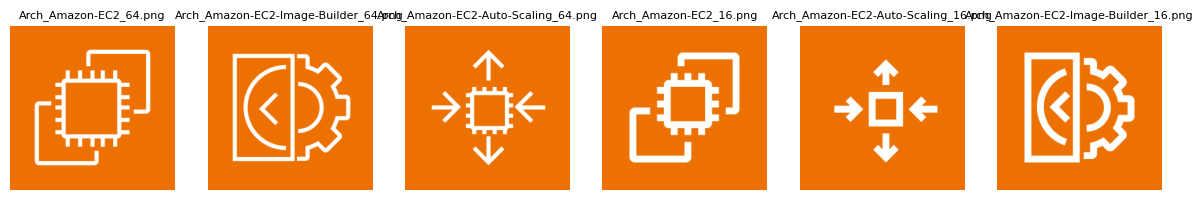

Service: amazon s3, samples: 6


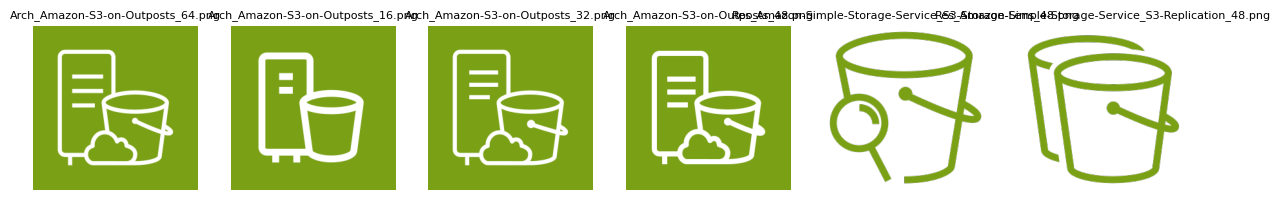

Service: amazon rds, samples: 6


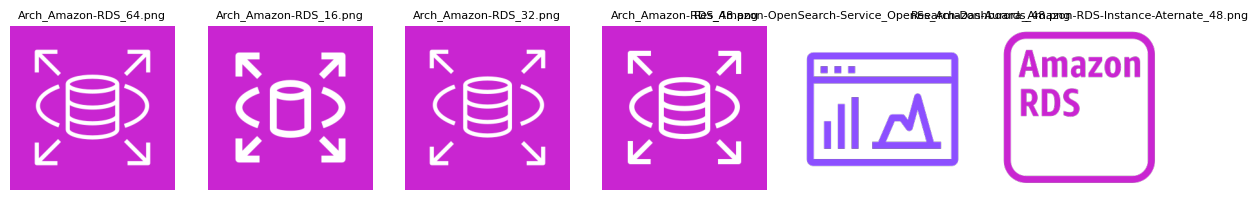

In [6]:
# 예시: 실제 포함된 서비스 이름 중 하나로 바꿔가며 확인
example_services = [
    "amazon ec2",
    "amazon s3",
    "amazon rds",
]

for svc in example_services:
    if svc in df_labels["canonical_service_name"].unique():
        show_icon_samples(svc, n=6)
    else:
        print(f"[WARN] {svc!r} not in dataset")


In [7]:
coarse_classes = sorted(df_labels["coarse_class"].unique())
coarse_classes[:10]


['AI & Machine Learning',
 'Analytics',
 'Application Integration',
 'Blockchain',
 'Business Applications',
 'Compute',
 'Containers & Orchestration',
 'Database',
 'DevOps & Developer Tools',
 'IoT']

Coarse: AI & Machine Learning, Example Service: amazon comprehend
Service: amazon comprehend, samples: 5


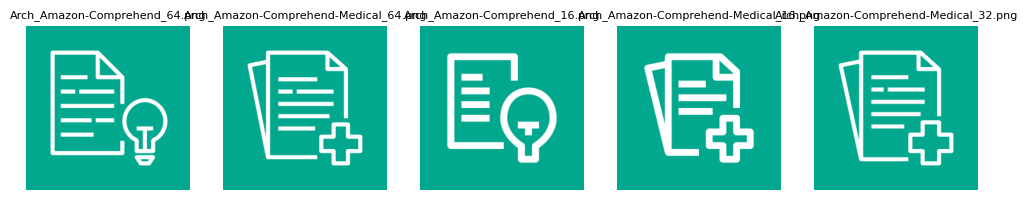

Coarse: Analytics, Example Service: amazon athena
Service: amazon athena, samples: 5


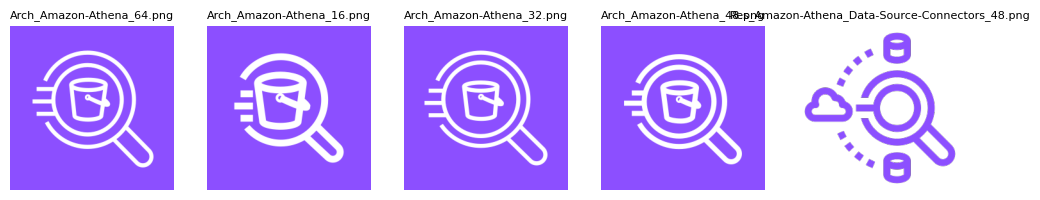

Coarse: Application Integration, Example Service: aws app mesh
Service: aws app mesh, samples: 5


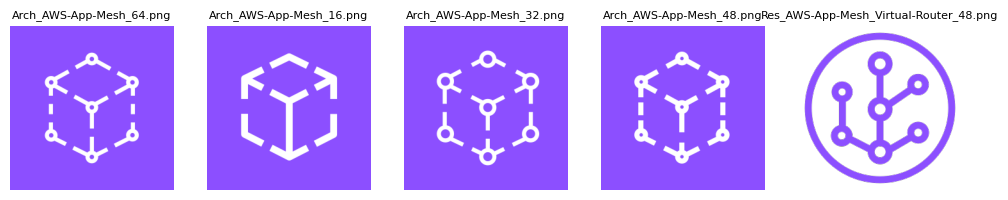

Coarse: Blockchain, Example Service: amazon managed blockchain
Service: amazon managed blockchain, samples: 5


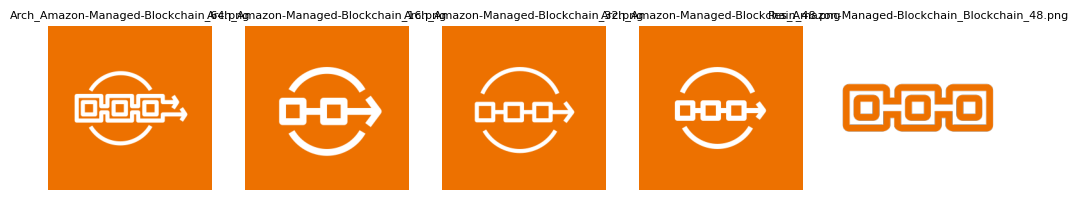

Coarse: Business Applications, Example Service: amazon workdocs
Service: amazon workdocs, samples: 5


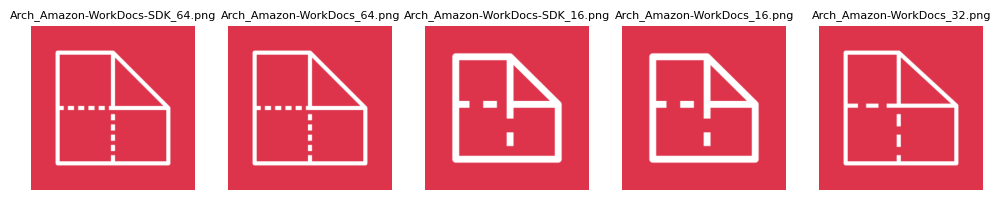

Coarse: Compute, Example Service: amazon ec2
Service: amazon ec2, samples: 5


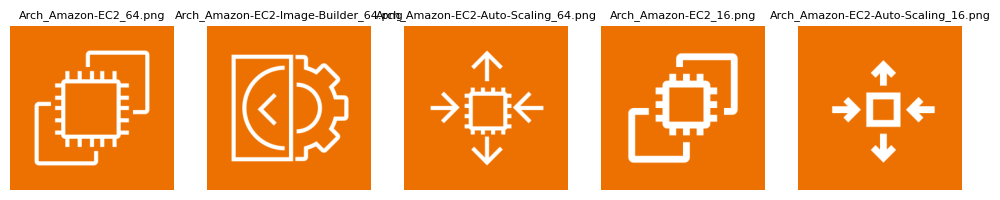

Coarse: Containers & Orchestration, Example Service: amazon ecs
Service: amazon ecs, samples: 5


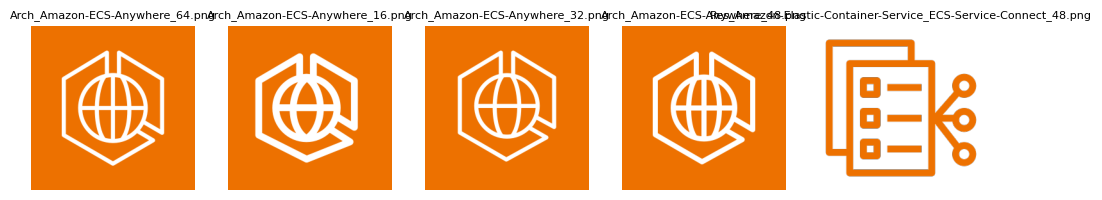

Coarse: Database, Example Service: amazon redshift
Service: amazon redshift, samples: 5


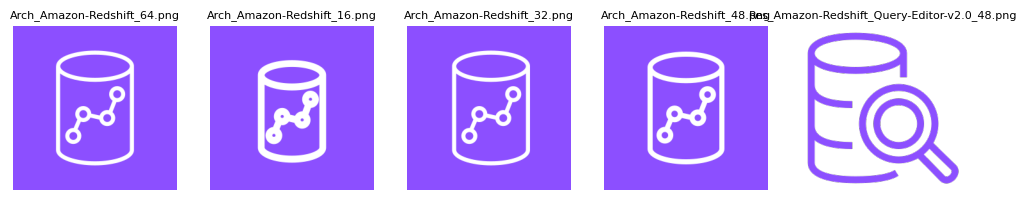

Coarse: DevOps & Developer Tools, Example Service: aws cloudformation
Service: aws cloudformation, samples: 5


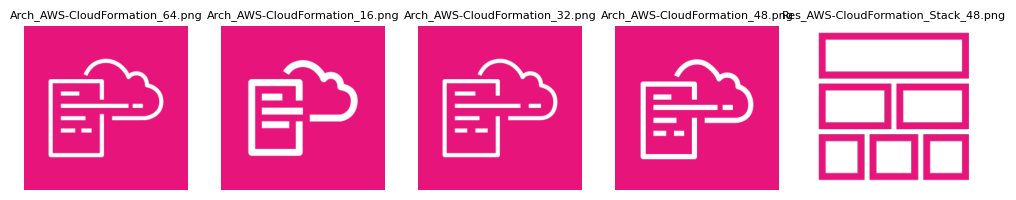

Coarse: IoT, Example Service: aws iot sitewise
Service: aws iot sitewise, samples: 5


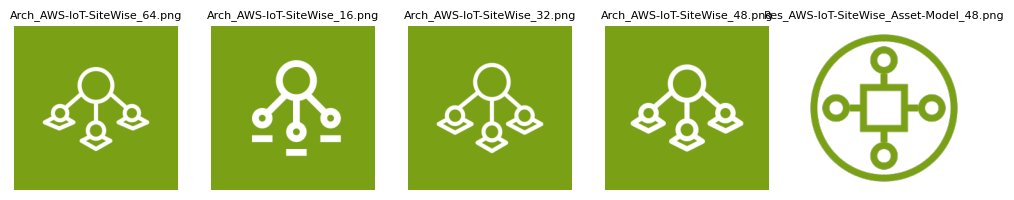

Coarse: Management & Governance, Example Service: aws systems manager
Service: aws systems manager, samples: 5


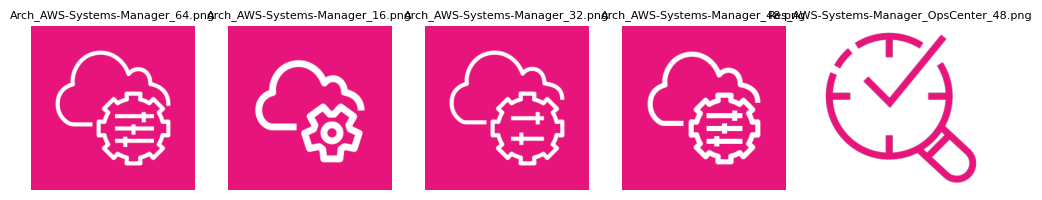

Coarse: Migration & Transfer, Example Service: aws database migration service
Service: aws database migration service, samples: 5


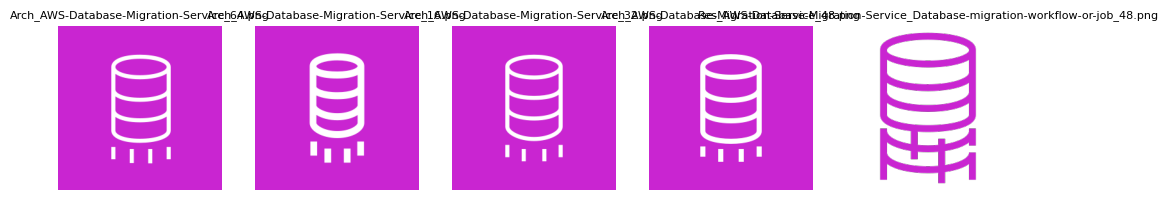

Coarse: Monitoring & Logging, Example Service: aws cloudtrail
Service: aws cloudtrail, samples: 5


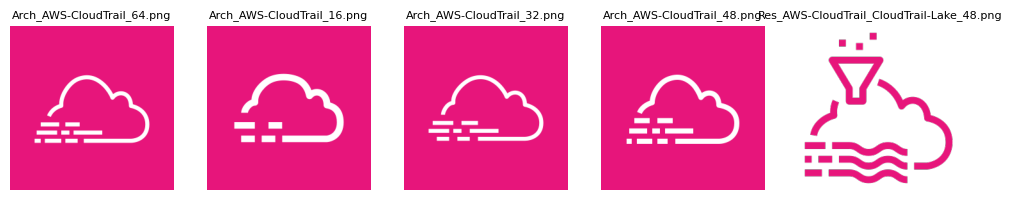

Coarse: Networking, Example Service: aws transit gateway
Service: aws transit gateway, samples: 5


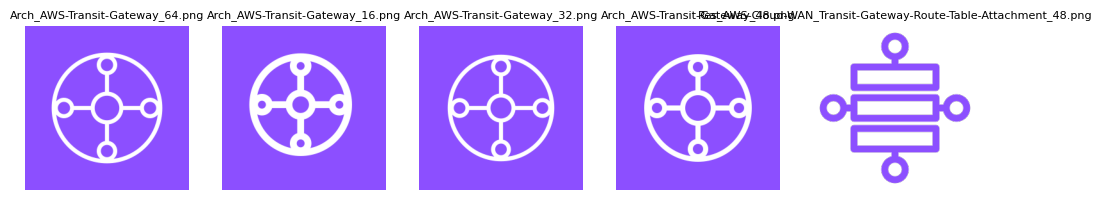

Coarse: Quantum, Example Service: amazon braket
Service: amazon braket, samples: 5


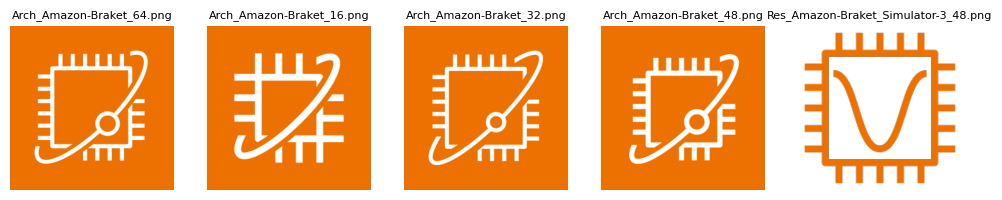

Coarse: Robotics / AR-VR, Example Service: aws robomaker
Service: aws robomaker, samples: 5


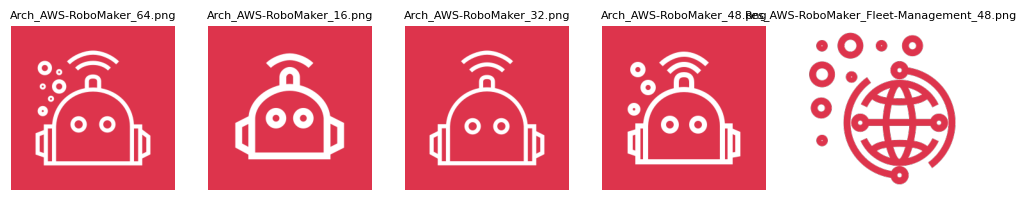

Coarse: Security & Identity, Example Service: aws waf
Service: aws waf, samples: 5


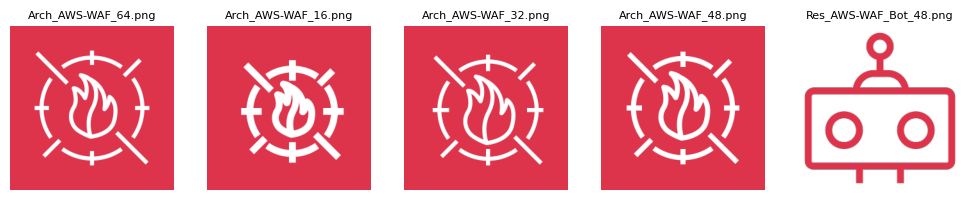

Coarse: Serverless & Event-driven, Example Service: amazon eventbridge
Service: amazon eventbridge, samples: 5


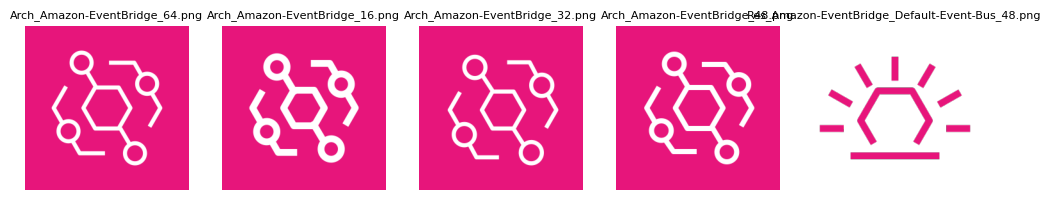

Coarse: Storage, Example Service: amazon efs
Service: amazon efs, samples: 5


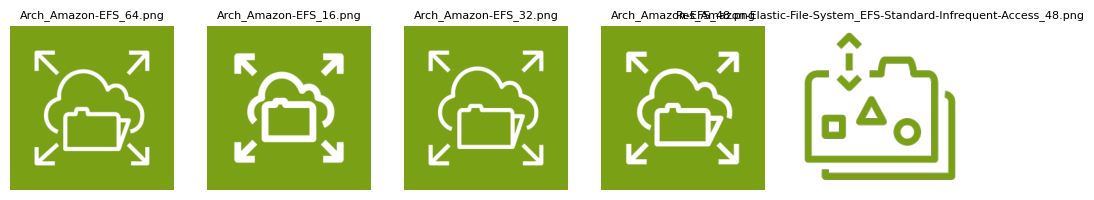

In [8]:
# coarse별로 하나씩 랜덤 서비스 골라 이미지 확인
import random

for coarse in coarse_classes:
    subset = df_labels[df_labels["coarse_class"] == coarse]
    if subset.empty:
        continue
    svc = random.choice(subset["canonical_service_name"].unique().tolist())
    print("=" * 80)
    print(f"Coarse: {coarse}, Example Service: {svc}")
    show_icon_samples(svc, n=5)
